In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
dataset = pd.read_csv('student_scores.csv')  

In [3]:
dataset.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0AB5FF470>,
      dtype=object)

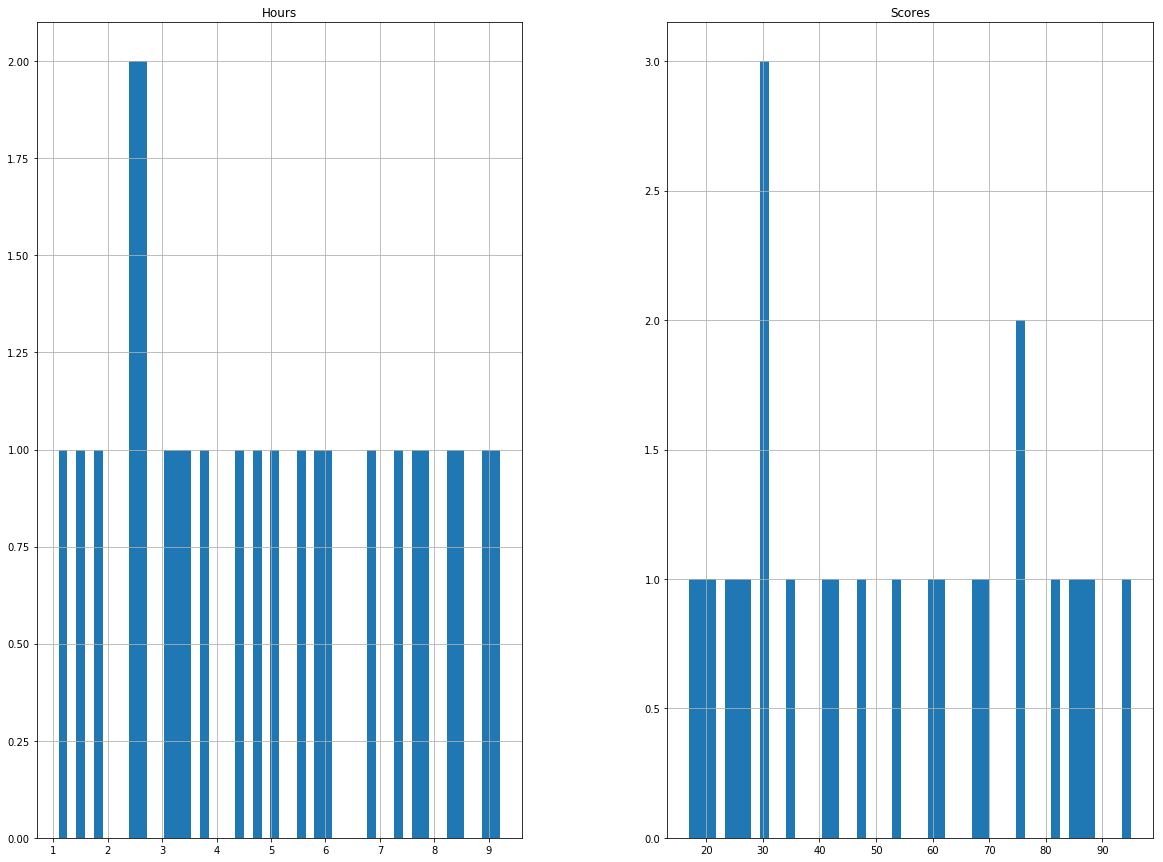

In [31]:
dataset.hist(figsize=(20,15),bins=50)

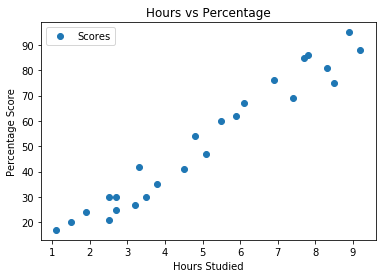

In [7]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

In [8]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [9]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [59]:
#Tính toán bằng tay để ra phương trinh y=a+bx;
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T,y)
print(y_lables)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(1, 10, 2)
print(x0)
y0 = w_0 + w_1*x0


[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
w =  [2.48367341 9.77580339]
[ 1. 10.]


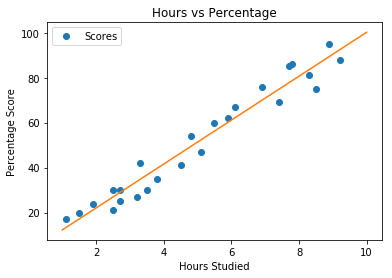

In [60]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(x0, y0) 
plt.show()  

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [15]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [29]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print(regressor.intercept_)  

2.826892353899737


In [19]:
print(regressor.coef_)  

[9.68207815]


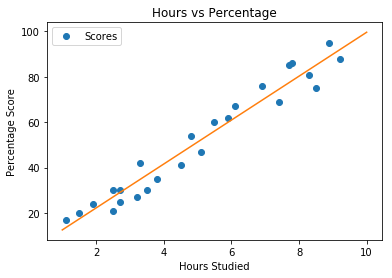

In [61]:
x1 = np.linspace(1, 10, 2)
y1=regressor.coef_*x1+regressor.intercept_

dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(x1, y1) 
plt.show()  

In [20]:
y_pred = regressor.predict(X_test)


In [62]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [63]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


In [30]:
from sklearn import datasets, linear_model
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)
print(regr.coef_)

[2.48367341 9.77580339]


# Example Two

In [64]:
inputdata = pd.read_csv('petrol_consumption.csv')  

In [68]:
inputdata.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [69]:
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [70]:
inputdata.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0ABCD8A58>,
      dtype=object)

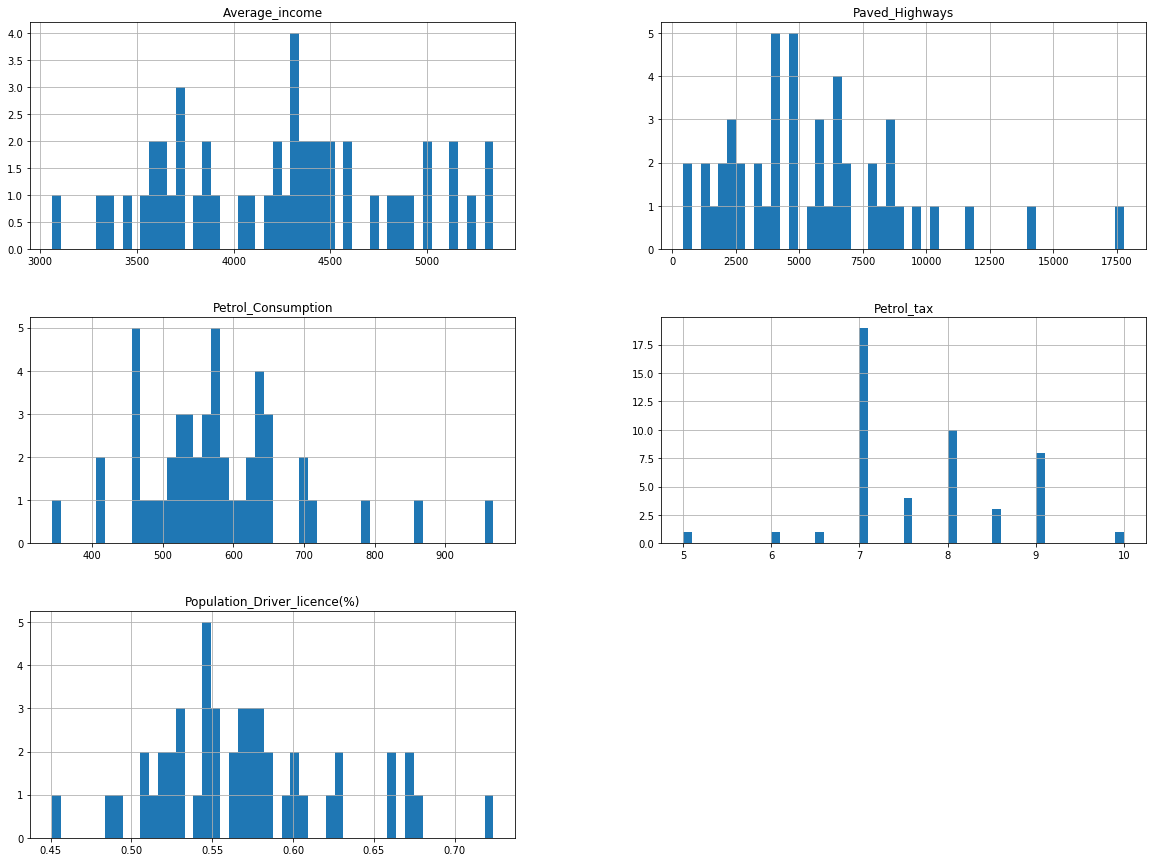

In [71]:
inputdata.hist(figsize=(20,15),bins=50)

In [74]:
# Petrol_tax Thuế xăng dầu 
#Average_income: Thu nhập bình quân
# Paved_Highways: Đường cao tốc nhựa
# Population_Driver_licence :Dân số lái xe
X = inputdata[['Petrol_tax', 'Average_income', 'Paved_Highways',  
       'Population_Driver_licence(%)']]
#Petrol_Consumption: Lượng thiêu thụ xăng
y = inputdata['Petrol_Consumption']  

In [75]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [86]:
X_test

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
29,9.0,3601,4650,0.493
4,8.0,4399,431,0.544
26,8.0,3448,5399,0.548
30,7.0,3640,6905,0.518
32,8.0,3063,6524,0.578
37,7.0,3897,6385,0.586
34,8.0,3528,3495,0.487
40,7.0,4449,4639,0.626
7,8.0,5126,2138,0.553
10,8.0,4391,5939,0.530


In [76]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
corr_matrix=inputdata.corr()
corr_matrix['Petrol_Consumption']

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
Name: Petrol_Consumption, dtype: float64

In [85]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [79]:
y_pred = regressor.predict(X_test)  

In [80]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [81]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


In [87]:
regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [88]:
regressor.intercept_

425.5993322032417

In [89]:
y=regressor.intercept_+regressor.coef_[0]*9+regressor.coef_[1]*3571+regressor.coef_[2]*1976+regressor.coef_[3]*0.525

In [90]:
y

526.9706787810247

In [91]:
y=regressor.intercept_+regressor.coef_[0]*9+regressor.coef_[1]*4092+regressor.coef_[2]*1250+regressor.coef_[3]*0.572

In [92]:
y

559.3999714575522